In [ ]:
import tensorflow as tf
import gdown
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import os

zip_path = '/content/periodontal_disease.zip'
extract_to = '/content/dataset'

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extraction completed to: {extract_to}")

if not os.path.exists(extract_to):
    os.makedirs(extract_to)

extract_zip(zip_path, extract_to)

os.remove(zip_path)


# Fungsi untuk mengunduh file dari Google Drive menggunakan URL
# def download_file_from_google_drive(url, dest_path):
#     gdown.download(url, dest_path, quiet=False)

# Fungsi untuk mengekstrak file zip
# def extract_zip_file(zip_path, extract_to):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#         print(f"File diekstraksi ke: {extract_to}")

# # URL file Google Drive
# url = 'https://drive.google.com/file/d/1BMX_Negz0OXg7yGv_YTOxkHrAFHjtFEL/view?usp=sharing'
# destination = 'dataset.zip'
# extract_to = 'dataset'  # Direktori tujuan untuk mengekstraksi file

# # Unduh file dari Google Drive
# download_file_from_google_drive(url, destination)

# # Ekstrak file zip
# if not os.path.exists(extract_to):
#     os.makedirs(extract_to)

# extract_zip_file(destination, extract_to)

# # Hapus file zip setelah diekstraksi (opsional)
# os.remove(destination)

Extraction completed to: /content/dataset


In [ ]:
dataset_dir = '/content/dataset/periodontal_disease'

train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'test')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 132 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [ ]:
# @title Default title text
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50
5/5 [==============================] - 22s 4s/step - loss: 11.9466 - accuracy: 0.4697 - val_loss: 0.7197 - val_accuracy: 0.3636
Epoch 2/50
5/5 [==============================] - 18s 3s/step - loss: 0.6991 - accuracy: 0.4773 - val_loss: 0.7311 - val_accuracy: 0.3636
Epoch 3/50
5/5 [==============================] - 18s 3s/step - loss: 0.6905 - accuracy: 0.4848 - val_loss: 0.6602 - val_accuracy: 0.6364
Epoch 4/50
5/5 [==============================] - 20s 3s/step - loss: 0.6847 - accuracy: 0.6212 - val_loss: 0.6619 - val_accuracy: 0.6364
Epoch 5/50
5/5 [==============================] - 18s 3s/step - loss: 0.6714 - accuracy: 0.6212 - val_loss: 0.6631 - val_accuracy: 0.6364
Epoch 6/50
5/5 [==============================] - 18s 3s/step - loss: 0.6743 - accuracy: 0.6212 - val_loss: 0.6661 - val_accuracy: 0.6364
Epoch 7/50
5/5 [==============================] - 19s 3s/step - loss: 0.6668 - accuracy: 0.6288 - val_loss: 0.6774 - val_accuracy: 0.6591
Epoch 8/50
5/5 [=================

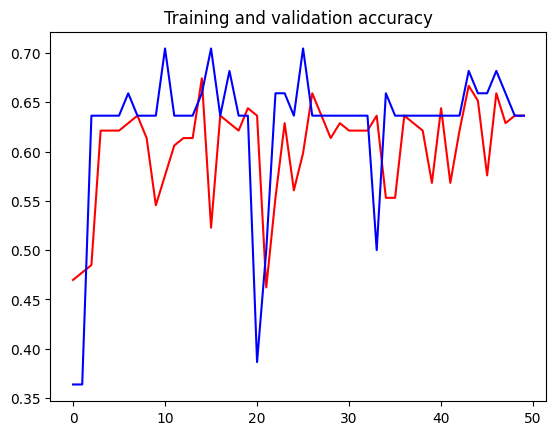

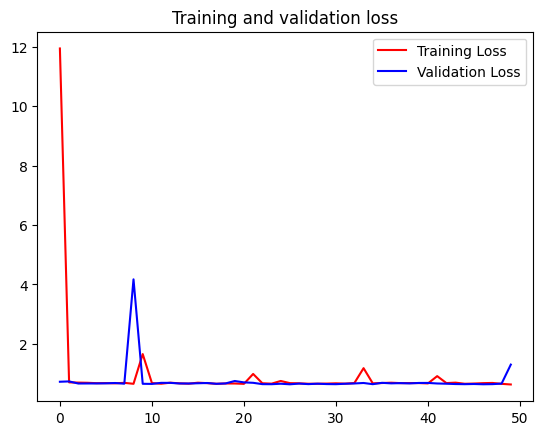

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()